# Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

## The Main aim is  model will predict whether a loan would be approved or not. 

## Import Modules

## Libraries for Data Analysis

In [382]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [383]:
import io
%cd "C:\Users\HP\Desktop\python\load prediction"

C:\Users\HP\Desktop\python\load prediction


## Datasets loading

In [384]:
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [385]:
train.shape

(614, 13)

In [386]:
test.shape

(367, 12)

In [387]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [388]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



## To balance the train data and test data taking dependent variable in separate variable and dropping the dependent variable from train data set 

In [389]:
y=train.Loan_Status

In [390]:
train=train.drop(['Loan_Status'],axis=1)

In [391]:
print(train.shape)
print(test.shape)

(614, 12)
(367, 12)


## Data Preprocessing

* Finding the missing values in train data

* The following list shows the total amount of missing or corrupt data in our data. To fix this, we replace missing 
* categorical variables with it's mode and missing numerical variables with it's mean or median

In [392]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [393]:
train.Credit_History=train.Credit_History.fillna(train.Credit_History).median()

In [394]:
train.Self_Employed=train.Self_Employed.fillna("missing")

In [395]:
train.LoanAmount=train.LoanAmount.fillna(train.LoanAmount).median()

In [396]:
train.Dependents=train.Dependents.fillna("missing")

In [397]:
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(train.Loan_Amount_Term).median()

In [398]:
train.Gender=train.Gender.fillna(train.Gender.value_counts().idxmax())

In [399]:
train.Married=train.Married.fillna(train.Married.value_counts().idxmax())

In [400]:
train.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Combining the Train and Test data sets

In [401]:
comdf=pd.concat([train,test],axis=0)

In [402]:
comdf=comdf.drop(['Loan_ID'],axis=1)

In [403]:
comdf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,128.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,128.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,128.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [404]:
comdf.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [405]:
comdf.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [406]:
comdf.Gender.value_counts(dropna=False)

Male      788
Female    182
NaN        11
Name: Gender, dtype: int64

In [407]:
comdf.Gender=comdf.Gender.fillna(comdf.Gender.value_counts().idxmax())

In [408]:
comdf.Gender=comdf.Gender.replace(['missing'],['Male'])

In [409]:
comdf.Married.value_counts(dropna=False)

Yes    634
No     347
Name: Married, dtype: int64

In [410]:
comdf.Dependents.value_counts(dropna=False)

0          545
1          160
2          160
3+          91
missing     15
NaN         10
Name: Dependents, dtype: int64

In [411]:
comdf.Dependents=comdf.Dependents.fillna(comdf.Dependents.value_counts().idxmax())

In [412]:
comdf.Education.value_counts(dropna=False)

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [413]:
comdf.Self_Employed.value_counts(dropna=False)

No         807
Yes        119
missing     32
NaN         23
Name: Self_Employed, dtype: int64

In [414]:
comdf.Self_Employed=comdf.Self_Employed.fillna(comdf.Self_Employed.value_counts().idxmax())

In [415]:
comdf.ApplicantIncome.value_counts(dropna=False)

2500    13
5000    11
3333    10
3500     9
2600     8
        ..
4554     1
2499     1
3523     1
6333     1
9200     1
Name: ApplicantIncome, Length: 752, dtype: int64

In [416]:
comdf.CoapplicantIncome.value_counts(dropna=False)

0.0       429
2500.0      6
2083.0      5
2000.0      5
2333.0      5
         ... 
1229.0      1
1587.0      1
4600.0      1
688.0       1
2393.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [417]:
comdf.LoanAmount.value_counts(dropna=False)

128.0    617
150.0     12
125.0     11
110.0     10
90.0       9
        ... 
59.0       1
103.0      1
48.0       1
57.0       1
98.0       1
Name: LoanAmount, Length: 145, dtype: int64

In [418]:
comdf.LoanAmount=comdf.LoanAmount.fillna(comdf.LoanAmount).median()

In [419]:
comdf.Loan_Amount_Term.value_counts(dropna=False)

360.0    925
180.0     22
480.0      8
300.0      7
NaN        6
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [420]:
comdf.Loan_Amount_Term=comdf.Loan_Amount_Term.fillna(comdf.Loan_Amount_Term).median()

In [421]:
comdf.Credit_History.value_counts(dropna=False)

1.0    893
0.0     59
NaN     29
Name: Credit_History, dtype: int64

In [422]:
comdf.Credit_History=comdf.Credit_History.fillna(comdf.Credit_History).median()

In [423]:
comdf.Property_Area.value_counts(dropna=False)

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [424]:
comdf.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Data Visualization

<AxesSubplot:ylabel='Frequency'>

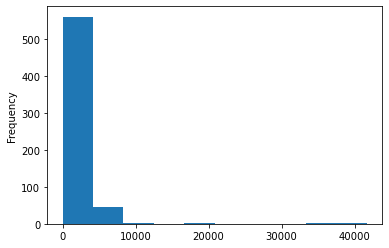

In [425]:
train.CoapplicantIncome.plot(kind='hist')   # Coapplicantincome has 0's so we can't apply log function

<AxesSubplot:ylabel='Frequency'>

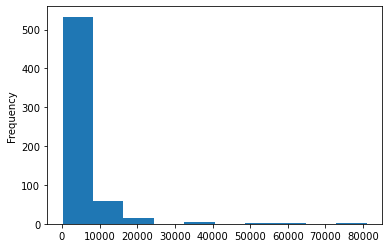

In [426]:
train.ApplicantIncome.plot(kind='hist')

In [427]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

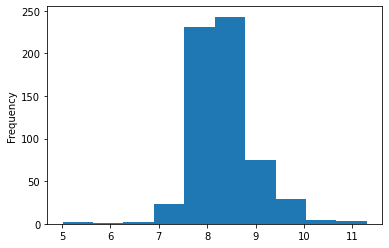

In [428]:
np.log(train.ApplicantIncome).plot(kind='hist')

<AxesSubplot:>

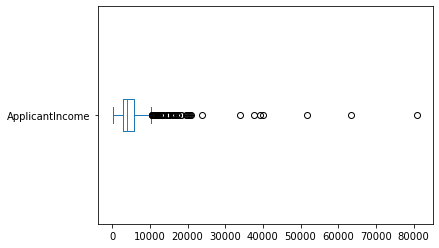

In [429]:
train.ApplicantIncome.plot(kind='box',vert=False)

<AxesSubplot:>

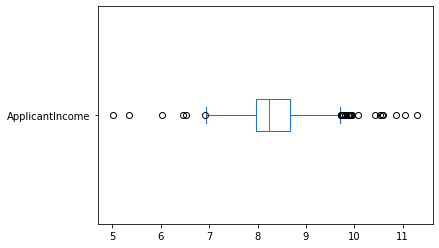

In [430]:
np.log(train.ApplicantIncome).plot(kind='box',vert=False)

<AxesSubplot:>

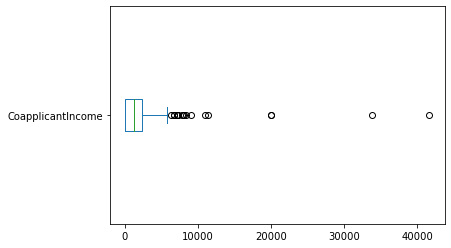

In [431]:
train.CoapplicantIncome.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

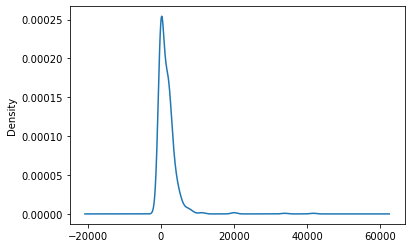

In [432]:
train.CoapplicantIncome.plot(kind='density')

<AxesSubplot:ylabel='Density'>

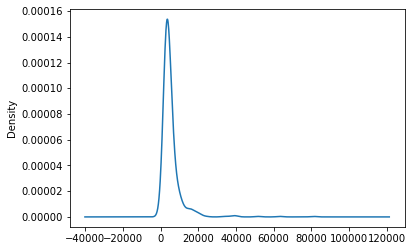

In [433]:
train.ApplicantIncome.plot(kind='density')

# Exploratory Data Analysis

## Data Aggregation

In [434]:
train.CoapplicantIncome.groupby(train.Gender).mean() 

Gender
Female    1108.008929
Male      1735.752829
Name: CoapplicantIncome, dtype: float64

In [435]:
train.LoanAmount.groupby(train.Gender).mean()

Gender
Female    128.0
Male      128.0
Name: LoanAmount, dtype: float64

In [436]:
train.ApplicantIncome.groupby(train.Dependents).median()

Dependents
0          3598.0
1          4051.5
2          4006.0
3+         4691.0
missing    4735.0
Name: ApplicantIncome, dtype: float64

In [437]:
import seaborn as sns

## Hypothesis Testing

In [439]:
train.ApplicantIncome.groupby(train.Gender).mean()

Gender
Female    4643.473214
Male      5573.017928
Name: ApplicantIncome, dtype: float64

In [440]:
train.ApplicantIncome.groupby(train.Gender).var()

Gender
Female    1.285496e+07
Male      4.265744e+07
Name: ApplicantIncome, dtype: float64

In [441]:
s=train[train.Gender=='Female']
d=train[train.Gender=='Male']

In [442]:
from scipy.stats import ttest_ind

In [443]:
ttest_ind(s.ApplicantIncome,d.ApplicantIncome,equal_var=False)

Ttest_indResult(statistic=-2.0798181188614193, pvalue=0.03839165635056259)

In [444]:
train.CoapplicantIncome.groupby(train.Property_Area).mean()

Property_Area
Rural        1645.536983
Semiurban    1520.133047
Urban        1716.350495
Name: CoapplicantIncome, dtype: float64

In [445]:
q=train[train.Property_Area=='Rural']
w=train[train.Property_Area=='Semiurban']
e=train[train.Property_Area=='Urban']

In [446]:
from scipy.stats import f_oneway  ## mean distortion

In [447]:
f_oneway(q.CoapplicantIncome,w.CoapplicantIncome,e.CoapplicantIncome)

F_onewayResult(statistic=0.25133306607668093, pvalue=0.7778436510798857)

In [448]:
pd.crosstab(train.Education,train.Self_Employed) ## plays a frequency counts

Self_Employed,No,Yes,missing
Education,,,
Graduate,389,65,26
Not Graduate,111,17,6


In [449]:
from scipy.stats import chi2_contingency

In [450]:
chi2_contingency(pd.crosstab(train.Education,train.Self_Employed))

(0.2760098941269262,
 0.8710943823759469,
 2,
 array([[390.87947883,  64.10423453,  25.01628664],
        [109.12052117,  17.89576547,   6.98371336]]))

In [451]:
objcols=comdf.select_dtypes(include='object')
numcols=comdf.select_dtypes(include=np.number)

In [452]:
print(objcols.shape)
print(numcols.shape)

(981, 6)
(981, 5)


 ### The next step is LabelEncouder ---- to change non-numeric variables to numeric variables we use label encouder

In [453]:
from sklearn.preprocessing import LabelEncoder  

In [454]:
le=LabelEncoder()

In [455]:
objdummy=objcols.apply(le.fit_transform)

In [456]:
cleandf=pd.concat([objdummy,numcols],axis=1) ## combining the objectdummy variables and numerics variables

In [457]:
cleandf.shape

(981, 11)

In [458]:
test.shape

(367, 12)

In [459]:
train.shape

(614, 12)

In [460]:
traincl=cleandf[0:614]

In [461]:
testcl=cleandf[615:981]

In [462]:
x=traincl # (predicted value)

In [463]:
y  #(actual value)

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## Logistic Regression

### Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

In [464]:
from sklearn.linear_model import LogisticRegression

In [465]:
lr=LogisticRegression(max_iter=500)

In [466]:
lrmodel=lr.fit(x,y)

In [467]:
lrmodel.score(x,y)

0.6889250814332247

In [468]:
lrpredict=lrmodel.predict(x)

In [469]:
from sklearn.model_selection import cross_val_score

In [470]:
cross_val_score(lrmodel,x,y)

array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

In [471]:
np.mean([0.69105691, 0.67479675, 0.68292683, 0.68292683, 0.68852459])

0.684046382

In [472]:
pd.crosstab(y,lrpredict)

col_0,N,Y
Loan_Status,,
N,2,190
Y,1,421


In [473]:
from sklearn.metrics import plot_roc_curve

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


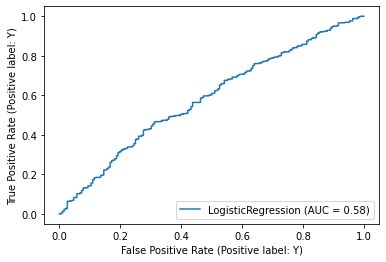

In [474]:
plot_roc_curve(lr,x,y)

In [475]:
testpre=lrmodel.predict(testcl)

In [476]:
pd.DataFrame(testpre).to_csv("lrmodel.csv")

In [477]:
from sklearn.metrics import classification_report

In [478]:
print(classification_report(y,lrpredict))

              precision    recall  f1-score   support

           N       0.67      0.01      0.02       192
           Y       0.69      1.00      0.82       422

    accuracy                           0.69       614
   macro avg       0.68      0.50      0.42       614
weighted avg       0.68      0.69      0.57       614



## Decision Tree 

### This is a supervised machine learning algorithm mostly used for classification problems. All features should be discretized in this model, so that the population can be split into two or more homogeneous sets or subsets. This model uses a different algorithm to split a node into two or more sub-nodes. With the creation of more sub-nodes, homogeneity and purity of the nodes increases with respect to the dependent variable.

In [479]:
from sklearn.tree import DecisionTreeClassifier

In [480]:
dtc=DecisionTreeClassifier(max_depth=5)

In [481]:
dtcmodel=dtc.fit(x,y)

In [482]:
dtcmodel.score(x,y)

0.7312703583061889

In [483]:
dtcpredict=dtcmodel.predict(x)

In [484]:
cross_val_score(dtcmodel,x,y)

array([0.66666667, 0.69105691, 0.68292683, 0.65853659, 0.67213115])

In [485]:
np.mean([0.69105691, 0.69918699, 0.68292683, 0.68292683, 0.68852459])

0.68892443

In [486]:
pd.crosstab(y,dtcpredict)

col_0,N,Y
Loan_Status,,
N,48,144
Y,21,401


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


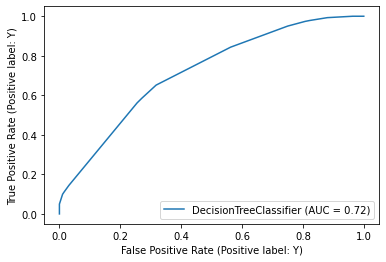

In [487]:
plot_roc_curve(dtc,x,y)

In [488]:
print(classification_report(y,dtcpredict))

              precision    recall  f1-score   support

           N       0.70      0.25      0.37       192
           Y       0.74      0.95      0.83       422

    accuracy                           0.73       614
   macro avg       0.72      0.60      0.60       614
weighted avg       0.72      0.73      0.69       614



In [489]:
testpre=dtcmodel.predict(testcl)

In [490]:
pd.DataFrame(testpre).to_csv("dtcmodel.csv")

## Random Forest 

### This is a tree based ensemble model which helps in improving the accuracy of the model . It combines a large number of Decision trees to build a powerful predicting model. It takes a random sample of rows and features of each individual tree to prepare a decision tree model. Final prediction class is either the mode of all the predictors or the mean of all the predictors.

In [491]:
from sklearn.ensemble import RandomForestClassifier

In [492]:
rfc=RandomForestClassifier(max_depth=6,n_estimators=5)

In [493]:
rfcmodel=rfc.fit(x,y)

In [494]:
rfcmodel.score(x,y)

0.742671009771987

In [495]:
rfcpredict=rfcmodel.predict(x)

In [496]:
pd.crosstab(y,rfcpredict)

col_0,N,Y
Loan_Status,,
N,37,155
Y,3,419


In [497]:
cross_val_score(rfcmodel,x,y)

array([0.69105691, 0.6504065 , 0.6504065 , 0.65853659, 0.68032787])

In [498]:
np.mean([0.48780488, 0.64227642, 0.68292683, 0.67479675, 0.66393443])

0.630347862

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


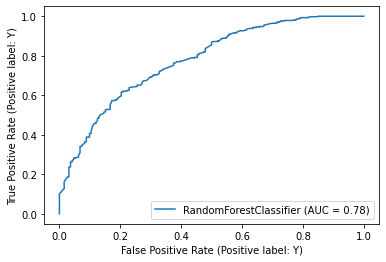

In [499]:
plot_roc_curve(rfc,x,y)

In [500]:
print(classification_report(y,rfcpredict))

              precision    recall  f1-score   support

           N       0.93      0.19      0.32       192
           Y       0.73      0.99      0.84       422

    accuracy                           0.74       614
   macro avg       0.83      0.59      0.58       614
weighted avg       0.79      0.74      0.68       614



In [501]:
testpre=rfcmodel.predict(testcl)

In [502]:
pd.DataFrame(testpre).to_csv("rfcmodel.csv")

### GradientBoostingClassifier

### This algorithm only works with the quantitative variable. It is a gradient boosting algorithm which forms strong rules for the model by boosting weak learners to a strong learner. It is a fast and efficient algorithm which recently dominated machine learning because of its high performance and speed.

In [503]:
from sklearn.ensemble import GradientBoostingClassifier

In [504]:
gbc=GradientBoostingClassifier(n_estimators=30)

In [505]:
gbcmodel=gbc.fit(x,y)

In [506]:
gbcmodel.score(x,y)

0.741042345276873

In [507]:
gbcpredict=gbcmodel.predict(x)

In [508]:
pd.crosstab(y,gbcpredict)

col_0,N,Y
Loan_Status,,
N,34,158
Y,1,421


In [509]:
cross_val_score(gbcmodel,x,y)

array([0.67479675, 0.69105691, 0.68292683, 0.66666667, 0.70491803])

In [510]:
np.mean([0.68292683, 0.69918699, 0.68292683, 0.67479675, 0.58196721])

0.664360922

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


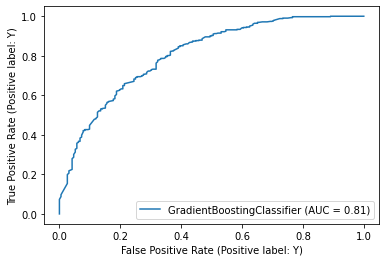

In [511]:
plot_roc_curve(gbc,x,y)

In [512]:
print(classification_report(y,gbcpredict))

              precision    recall  f1-score   support

           N       0.97      0.18      0.30       192
           Y       0.73      1.00      0.84       422

    accuracy                           0.74       614
   macro avg       0.85      0.59      0.57       614
weighted avg       0.80      0.74      0.67       614



In [513]:
testpre=gbcmodel.predict(testcl)

In [514]:
pd.DataFrame(testpre).to_csv("gbcmodel.csv")

## Support Vector Machine

### The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [515]:
from sklearn.svm import SVC

In [516]:
svc=SVC()

In [517]:
svcmodel=svc.fit(x,y)

In [518]:
svcmodel.score(x,y)

0.6921824104234527

In [519]:
svcpredict=svcmodel.predict(x)

In [520]:
cross_val_score(svcmodel,x,y)

array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

In [521]:
np.mean([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459])

0.687298414

In [522]:
pd.crosstab(y,svcpredict)

col_0,N,Y
Loan_Status,,
N,3,189
Y,0,422


In [523]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           N       1.00      0.02      0.03       192
           Y       0.69      1.00      0.82       422

    accuracy                           0.69       614
   macro avg       0.85      0.51      0.42       614
weighted avg       0.79      0.69      0.57       614



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


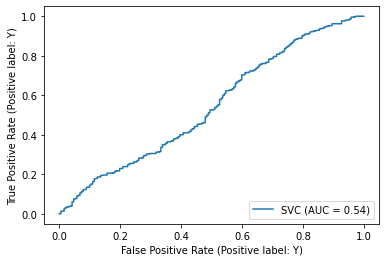

In [524]:
plot_roc_curve(svc,x,y)

In [525]:
testpre=svcmodel.predict(testcl)

In [526]:
pd.DataFrame(testpre).to_csv("svcmodel.csv")

## I predeicted test data in Analytics vidya , SVM is the best fit model.